In [ ]:
delta_t = 7
data = np.array([generate_phi(delta_t) @ Q @ generate_phi(delta_t).T for delta_t in np.linspace(0,delta_t,10)])
#data.shape # 7,4,4 the 4,4 is the matrix !! 
integrate_data = np.trapz(data, axis=0)
integrate_data

array([[62.37222222,  0.        ,  9.45      ,  0.        ],
       [ 0.        , 23.79074074,  0.        ,  3.15      ],
       [ 9.45      ,  0.        ,  2.7       ,  0.        ],
       [ 0.        ,  3.15      ,  0.        ,  0.9       ]])

In [ ]:
generate_phi(delta_t)

array([[1., 0., 7., 0.],
       [0., 1., 0., 7.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
P_0 = np.array([
    [100,0,0,0],
    [0,10,0,0],
    [0,0,10,0],
    [2,0,0,10]
])
P_0.T

array([[100,   0,   0,   2],
       [  0,  10,   0,   0],
       [  0,   0,  10,   0],
       [  0,   0,   0,  10]])

In [ ]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [ ]:
np.arange(0,30,0.3)

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
        3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
        6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
        9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
       13.2, 13.5, 13.8, 14.1, 14.4, 14.7, 15. , 15.3, 15.6, 15.9, 16.2,
       16.5, 16.8, 17.1, 17.4, 17.7, 18. , 18.3, 18.6, 18.9, 19.2, 19.5,
       19.8, 20.1, 20.4, 20.7, 21. , 21.3, 21.6, 21.9, 22.2, 22.5, 22.8,
       23.1, 23.4, 23.7, 24. , 24.3, 24.6, 24.9, 25.2, 25.5, 25.8, 26.1,
       26.4, 26.7, 27. , 27.3, 27.6, 27.9, 28.2, 28.5, 28.8, 29.1, 29.4,
       29.7])

In [ ]:

import numpy as np
import pandas as pd

def kalman_filter(x,P,phi,Q,H,R,z): # R is the measurement noise covariance 
    x_minus = phi @ x # Estimate position 
    P_minus = phi @ P @ phi.T + Q # estimate covariance matrix 
    K_k = P_minus @ H.T @ np.linalg.inv(H @ P_minus@ H.T+R)  # Kalman Gain
    innovation = z - H @ x_minus
    return x_minus + K_k @ innovation , P_minus - K_k@H@P_minus

In [ ]:
def generate_phi(delta_t):
    upper = np.concatenate((np.eye(2),delta_t*np.eye(2)),axis=1)
    lower = np.concatenate((np.zeros((2,2)),np.eye(2)),axis=1)
    phi_cv = np.concatenate((upper,lower))
    return phi_cv
def generate_Q_k(delta_t,Q): # delta is integer for the integral !!!
    '''Integrate from 0 to delta_t '''
    #np.trapz(generate_phi(delta_t) @ Q @ generate_phi(delta_t).T, axis=0)
    data = np.array([generate_phi(delta_t) @ Q @ generate_phi(delta_t).T for delta_t in np.linspace(0,delta_t,10)]) 
    integrate_data = np.trapz(data, axis=0)
    return integrate_data # Q_k note zarchan page 135 !!!

In [ ]:
phi_delete = generate_phi(2)
x_delete = np.array([1,1,2,2])
phi_delete @ x_delete

array([5., 5., 2., 2.])

Text(0, 0.5, 'Error y[m/s]')

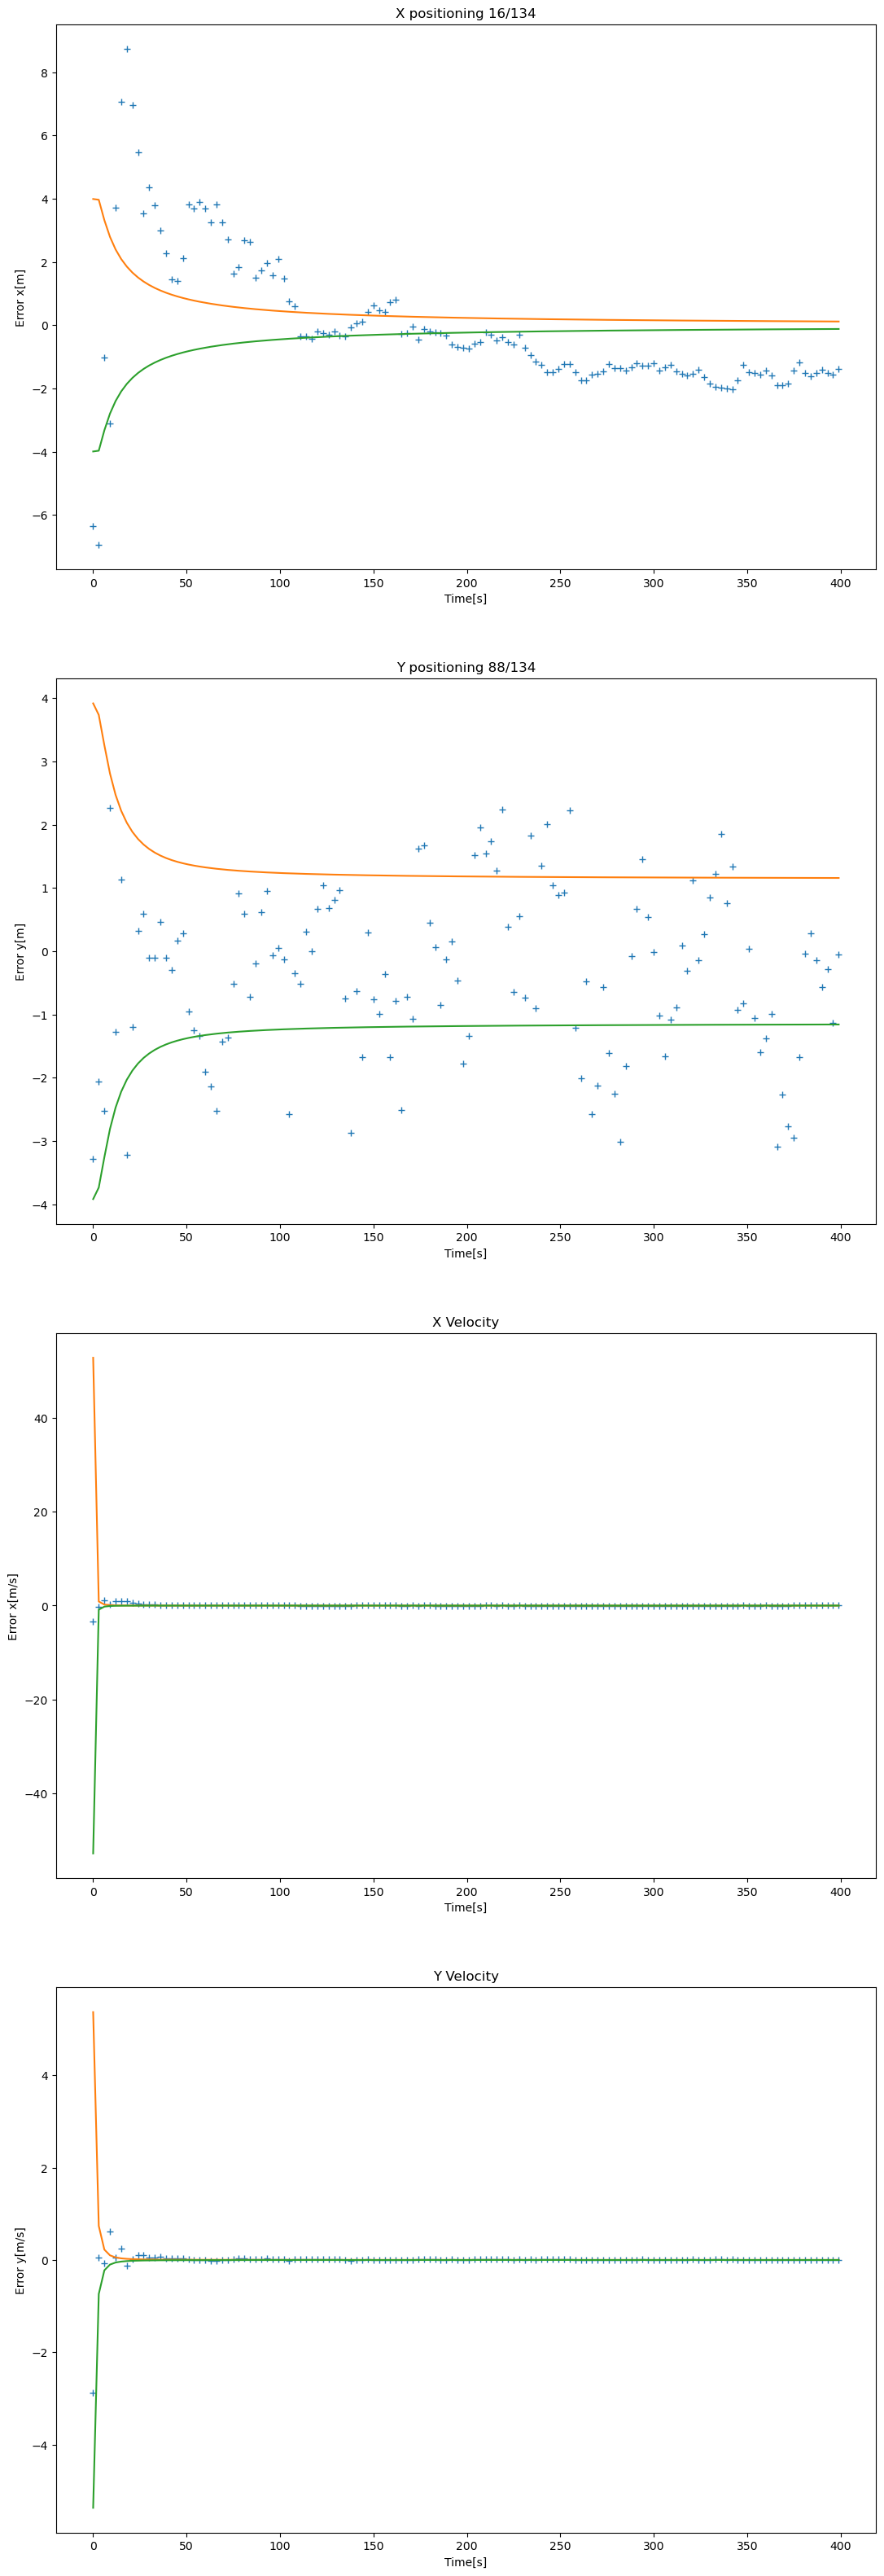

In [ ]:
#plt.clf()


import numpy as np
rng = np.random.default_rng(12345)
rfloat = rng.random()
#rfloat

#fig1, ax = plt.subplots(1,1,figsize=(5, 2.7), layout='constrained')
fig2, ax_standard = plt.subplots(4,1,figsize=(13, 40))

#plt.close()
P_0 = np.array([
    [1000,0,0,0],
    [0,100,0,0],
    [0,0,100,0],
    [0,0,0,10]
])


z = np.array([0,1]).reshape(2,1)
R = np.array([[4,0],
              [0,4]])

pos = np.array([0,-10]).reshape(2,1)
v= np.array([5,5]).reshape(2,1)
x_0 = np.concatenate((pos,v),axis=0)

Q = np.zeros((4,4))
Q[0,0] = 0.0 # q_k^y
Q[1,1] = 0.05 # q_k^x
Q[2,2] = 0.0 # q_k^x
Q[3,3] = 0.0 # q_k^y
Q

H_CV = np.concatenate((np.eye(2),np.zeros((2,2))),axis=1)
H_CV

delta_t = 3
phi_cv = generate_phi(delta_t)
#upper = np.concatenate((np.eye(2),delta_t*np.eye(2)),axis=1)
#lower = np.concatenate((np.zeros((2,2)),np.eye(2)),axis=1)
#phi_cv = np.concatenate((upper,lower))

Q_k = generate_Q_k(delta_t,Q)


x_n_minus_one = x_0
P_n_minus_one = P_0
location_arr = []
location_uncertainty = []
time_dur = 400
time_jumps =delta_t

location_x=[]
location_x_uncertainty=[]
location_y=[]
location_y_uncertainty=[]
velocity_x=[]
velocity_x_uncertainty=[]
velocity_y=[]
velocity_y_uncertainty=[]
sample_size = np.arange(0, time_dur, time_jumps).shape[0] *2
for t in np.arange(0, time_dur, time_jumps):
    z = v*t + x_0[:2] + 4 * np.random.randn(2, 1) #+np.array([20*(rng.random()-0.5),10*(rng.random()-0.5)]).reshape(2,1)
    x_n,P_n = kalman_filter(x_n_minus_one,
                            P_n_minus_one,
                            phi_cv,
                            Q_k,
                            H_CV,R,z)
    #x_n,P_n = x_n_minus_one,P_n_minus_one
    x_n_minus_one,P_n_minus_one =  x_n,P_n
    location_arr.append(x_n_minus_one[:2])
    location_arr.append(x_n_minus_one[:2])
    eigen_value, eigen_vector = np.linalg.eig(P_n_minus_one[:2,:2])
    location_uncertainty.append(eigen_vector[:,0]*eigen_value[0])
    location_uncertainty.append(eigen_vector[:,1]*eigen_value[1])
    location_x.append(x_n_minus_one[0]) #x location !
    location_x_uncertainty.append(P_n_minus_one[0,0]) # x uncertainty !
    location_y.append(x_n_minus_one[1]) #y location !
    location_y_uncertainty.append(P_n_minus_one[1,1]) # x uncertainty !
    velocity_x.append(x_n_minus_one[2]) #y location !
    velocity_x_uncertainty.append(P_n_minus_one[2,2]) # x uncertainty !
    velocity_y.append(x_n_minus_one[3]) #y location !
    velocity_y_uncertainty.append(P_n_minus_one[3,3]) # x uncertainty !

    
#origin = np.array(location_arr)
#V = np.array(location_uncertainty)

#qui = ax.quiver(origin[:,0],origin[:,1], V[:,0], V[:,1], scale=21,color=[(0, 0, i) for i in np.linspace(0,1,sample_size) ])
#ax.set_xlabel(r'x[m]')  # Add an x-label to the Axes.
#ax.set_ylabel(r'y[m]')  # Add a y-label to the Axes.
#ax.set_title("Trace of trajectory")  # Add a title to the Axes.


GT_x = [v*t + x_0[:2] for t in np.arange(0, time_dur, time_jumps)]
time = [t for t in np.arange(0, time_dur, time_jumps)]
error_x = np.array(location_x) - np.array(GT_x)[:,0]
data_pos_x = error_x[(error_x.ravel()<np.array(location_x_uncertainty))&(error_x.ravel() > -np.array(location_x_uncertainty))]
leng_pos_x_in = str(len(data_pos_x))
leng_pos_x_total = str(len(error_x))
ax_standard[0].plot(time, error_x,'+', label='estimated x position')
ax_standard[0].plot(time, np.array(location_x_uncertainty), label='estimated error x position-')
ax_standard[0].plot(time, -np.array(location_x_uncertainty), label='estimated error x position+')
ax_standard[0].set_title("X positioning" + " " +leng_pos_x_in + "/" + leng_pos_x_total)
ax_standard[0].set_xlabel('Time[s]')
ax_standard[0].set_ylabel('Error x[m]')

GT_y = [v*t + x_0[:2] for t in np.arange(0, time_dur, time_jumps)]
time = [t for t in np.arange(0, time_dur, time_jumps)]
error_y = np.array(location_y) - np.array(GT_y)[:,1]
data_pos_y = error_y[(error_y.ravel()<np.array(location_y_uncertainty))&(error_y.ravel() > -np.array(location_y_uncertainty))]
leng_pos_y_in = str(len(data_pos_y))
leng_pos_y_total = str(len(error_y))
ax_standard[1].plot(time, error_y,'+', label='estimated y position')
ax_standard[1].plot(time, np.array(location_y_uncertainty), label='estimated error y position-')
ax_standard[1].plot(time, -np.array(location_y_uncertainty), label='estimated error y position+')
ax_standard[1].set_title("Y positioning" + " " +leng_pos_y_in + "/" + leng_pos_y_total)
ax_standard[1].set_xlabel('Time[s]')
ax_standard[1].set_ylabel('Error y[m]')


GT_velo_x = [v[0] for t in np.arange(0, time_dur, time_jumps)]
time = [t for t in np.arange(0, time_dur, time_jumps)]
error_velo_x = np.array(velocity_x) - np.array(GT_velo_x)
ax_standard[2].plot(time, error_velo_x,'+', label='estimated x velocity')
ax_standard[2].plot(time, np.array(velocity_x_uncertainty), label='estimated error x velocity-')
ax_standard[2].plot(time, -np.array(velocity_x_uncertainty), label='estimated error x velocity+')
ax_standard[2].set_title("X Velocity")
ax_standard[2].set_xlabel('Time[s]')
ax_standard[2].set_ylabel('Error x[m/s]')


GT_velo_y = [v[1] for t in np.arange(0, time_dur, time_jumps)]
time = [t for t in np.arange(0, time_dur, time_jumps)]
error_velo_y = np.array(velocity_y) - np.array(GT_velo_y)
ax_standard[3].plot(time, error_velo_y,'+', label='estimated y position')
ax_standard[3].plot(time, np.array(velocity_y_uncertainty), label='estimated error y velocity-')
ax_standard[3].plot(time, -np.array(velocity_y_uncertainty), label='estimated error y velocity+')
ax_standard[3].set_title("Y Velocity")
ax_standard[3].set_xlabel('Time[s]')
ax_standard[3].set_ylabel('Error y[m/s]')


In [ ]:
np.array(GT_x)[:,0].ravel()

array([   0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
        165,  180,  195,  210,  225,  240,  255,  270,  285,  300,  315,
        330,  345,  360,  375,  390,  405,  420,  435,  450,  465,  480,
        495,  510,  525,  540,  555,  570,  585,  600,  615,  630,  645,
        660,  675,  690,  705,  720,  735,  750,  765,  780,  795,  810,
        825,  840,  855,  870,  885,  900,  915,  930,  945,  960,  975,
        990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140,
       1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305,
       1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440, 1455, 1470,
       1485, 1500, 1515, 1530, 1545, 1560, 1575, 1590, 1605, 1620, 1635,
       1650, 1665, 1680, 1695, 1710, 1725, 1740, 1755, 1770, 1785, 1800,
       1815, 1830, 1845, 1860, 1875, 1890, 1905, 1920, 1935, 1950, 1965,
       1980, 1995])

In [ ]:
np.array(location_x)[:,0].ravel()

array([  0.        ,   1.59253439,  15.78163449,  31.81900543,
        43.97659375,  57.11944384,  73.53727696,  88.72601187,
       105.26120966, 120.09186156, 136.05528615, 150.09307858,
       162.57948502, 178.33158152, 194.27789451, 209.12442147,
       224.88322255, 239.95186514, 255.25126367, 269.72524275,
       284.58363254, 299.83671974, 315.56658997, 329.38077094,
       344.90617948, 360.22124184, 375.4692371 , 390.85324878,
       406.17159823, 420.73170773, 434.83752248, 450.34547573,
       464.82191521, 479.84301417, 495.03242444, 510.68945876,
       525.33403672, 540.33670042, 555.29874424, 569.93959647,
       585.16642708, 599.83784952])

In [ ]:
str(1)

'1'

In [ ]:
error_x.ravel().shape

(134,)

In [ ]:
np.array(location_x_uncertainty).shape

(134,)

In [ ]:
barak = error_x.ravel()<np.array(location_x_uncertainty)
barak.shape

(134,)

In [ ]:
data_pos_x = error_x[(error_x<np.array(location_x_uncertainty))&(error_x > -np.array(location_x_uncertainty))]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 134

In [ ]:
time_dur

125

In [ ]:
time_jumps

3

In [ ]:
np.arange(0, time_dur, time_jumps)

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123])

In [ ]:
np.array(GT_x).shape

(18, 2, 1)

In [ ]:
np.array(GT_x)[:,0].ravel().shape

(18,)

In [ ]:
error_x.shape

(18, 1)

In [ ]:
np.array(location_x).ravel().shape

(18,)

In [ ]:
-np.array(location_x_uncertainty)

array([-100.        ,   -3.97562359,   -3.92988468,   -3.89198802,
         -3.89167166,   -3.8916562 ,   -3.89165559,   -3.89165558,
         -3.89165558,   -3.89165558,   -3.89165558,   -3.89165558,
         -3.89165558,   -3.89165558,   -3.89165558,   -3.89165558,
         -3.89165558,   -3.89165558])

In [ ]:
barak = np.array([1,2,3,4,5,6,7])
barak[(barak >4) & (barak <6)]

array([5])

# Learn MatPlotLib
## Creating Some basic plots 

Text(0, 0.5, 'entry b')

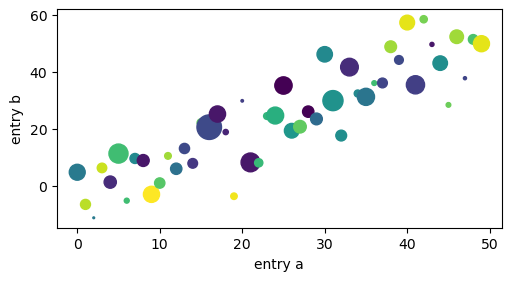

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

In [ ]:
np.random.randn(50).shape

(50,)

In [ ]:
np.random.randn(3)

array([-0.0327092 ,  0.54254451, -0.00588783])

In [ ]:
np.random.randint(0, 3, 100).shape

(100,)

In [ ]:
np.random.randint(0, 3, 100)

array([1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 0,
       2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2])

(-2.0, 2.0)

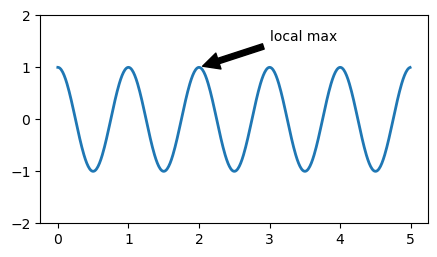

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In [ ]:
np.arange(0, 100, 30).shape

(4,)

<matplotlib.legend.Legend>

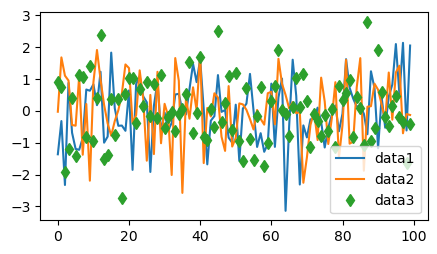

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

In [ ]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])